# Signals and Systems CA2
Name : Mohamad Taha Fakharian

Student No: 810198449

# Question 1: Intro to Fourier Transform

## Problems
* [Sine/Complex-Sine Waves](#Sine/Complex-Sine-Waves)
    * [A](#1-1A)
    * [B](#1-1B)
    * [C](#1-1C)
* [Dot/Complex-Dot Product](#Dot/Complex-Dot-Product)
    * [A](#1-2A)
    * [B](#1-2B)
    * [C](#1-2C)
    * [D](#1-2D)

In [297]:
# Necessary imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Sine/Complex Sine Waves

Plotting some sine waves

In [298]:
# Some constants
STARTING = 0
ENDING = 2
SAMPLING_RATE = 500
J = complex(0, 1)
from numpy import pi as PI

# Sine/Complex Sine Waves

# 1-1A
Sine wave

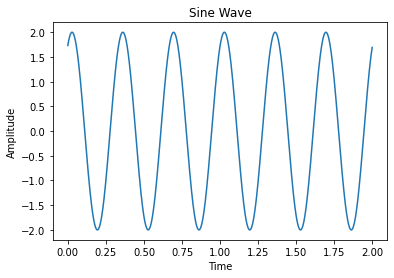

In [299]:
freq = 3
amplitude = 2
phase = PI/3

t = np.arange(STARTING, ENDING, 1/SAMPLING_RATE)
sine = amplitude * np.sin(2 * PI * freq * t + phase)
plt.title("Sine Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(t, sine)
plt.show()

# 1-1B
Complex sine wave

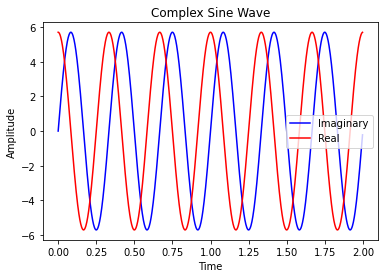

In [300]:
freq = 3
amplitude = 2
phase = PI/3

complex_sine = amplitude * np.exp(2 * PI * freq * t*J + phase)
plt.title("Complex Sine Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(t, np.imag(complex_sine), 'b', t, np.real(complex_sine), 'r')
plt.legend(["Imaginary", "Real"], loc="best")
plt.show()

As you can see, the real plot is shifted form of imaginary plot.

# 1-1C
3D plotting

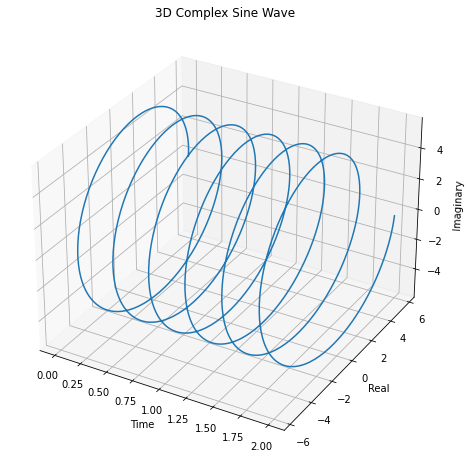

In [301]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(8,8))
ax = figure.add_subplot(projection='3d')

img = ax.plot(t, np.real(complex_sine), np.imag(complex_sine))

ax.set_title("3D Complex Sine Wave")
ax.set_xlabel("Time")
ax.set_ylabel("Real")
ax.set_zlabel("Imaginary")
plt.show()

As you can see, real and imaginary parts form a spring shaped plot in a 3D space.

# Dot/Complex-Dot-Product

# 1-2A
We can interpret dot product as sum of covariance of the vectors in a statically manner. More information is detailed at report.

# 1-2B

In [302]:
# function for generating sine wave
def sin(t, f, amplitude, phase):
    return amplitude * np.sin(2 *  PI * f * t + phase)

f = 5
amplitude = 2
phase = PI/2
# Two identical waves
wave_1 = sin(t, f, amplitude, phase)
wave_2 = sin(t, f, amplitude, phase)
print("Dot product: ", np.dot(wave_1, wave_2))

Dot product:  2000.0


In [303]:
# Changing frequency
wave_2 = sin(t, f + 0.5, amplitude, phase)
print("Dot product: ", np.dot(wave_1, wave_2))

Dot product:  -2.7116087153444823e-12


In [304]:
# Changing frequency
wave_2 = sin(t, f + 0.35, amplitude, phase)
print("Dot product: ", np.dot(wave_1, wave_2))

Dot product:  -444.45773444445524


In [305]:
# Changing phase
wave_2 = sin(t, f, amplitude, phase + PI/2)
print("Dot product: ", np.dot(wave_1, wave_2))

Dot product:  1.7983947664390598e-12


In [306]:
# Changing phase
wave_2 = sin(t, f, amplitude, phase + PI/3)
print("Dot product: ", np.dot(wave_1, wave_2))

Dot product:  1000.0000000000011


# 1-2C
Working with sine waves

In [307]:
# Initializing new parameters
STARTING = -1
ENDING = 1
SAMPLING_RATE = 1000
THETA = 0

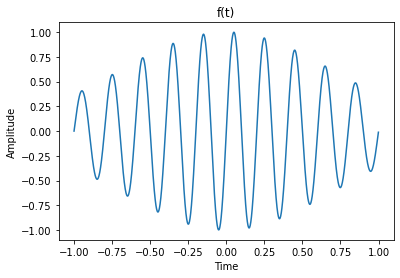

In [308]:
f_range = np.arange(2, 10, 0.5)
freq = 5
t = np.arange(STARTING, ENDING, 1/SAMPLING_RATE)

def f(theta):
    return np.sin(2 * PI * freq * t + theta) * np.exp(-(t**2))

plt.title("f(t)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(t, f(0))
plt.show()

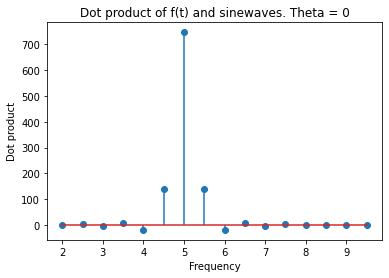

In [309]:
products = np.array([np.dot(f(0), sin(t, fre, 1, 0)) for fre in f_range])

plt.xlabel("Frequency")
plt.ylabel("Dot product")
plt.title("Dot product of f(t) and sinewaves. Theta = {}".format(0))
plt.stem(f_range, products, use_line_collection=True)
plt.show()

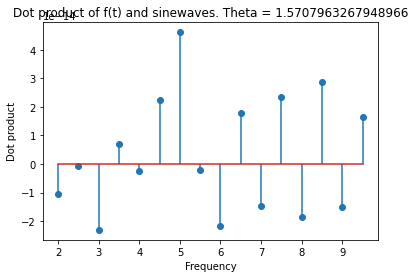

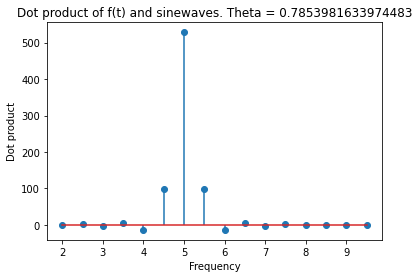

In [310]:
# Changing thetas
for arg in [PI/2 , PI/4]:
    products = np.array([np.dot(f(arg), sin(t, fre, 1, 0)) for fre in f_range])

    plt.xlabel("Frequency")
    plt.ylabel("Dot product")
    plt.title("Dot product of f(t) and sinewaves. Theta = {}".format(arg))
    plt.stem(f_range, products, use_line_collection=True)
    plt.show()


# 1-2D
Working with complex sine waves

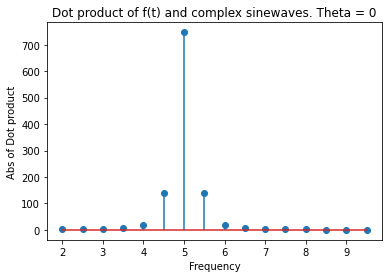

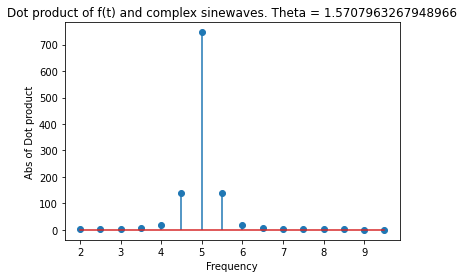

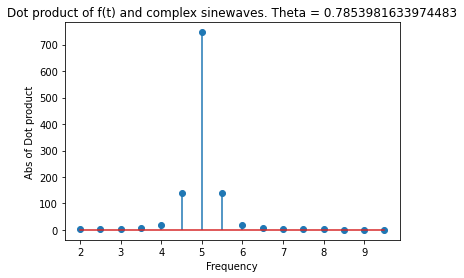

In [311]:
for arg in [0, PI/2 , PI/4]:
    products = np.array([np.dot(f(arg), np.exp(2 * PI * fre * t*J)) for fre in f_range])

    plt.xlabel("Frequency")
    plt.ylabel("Abs of Dot product")
    plt.title("Dot product of f(t) and complex sinewaves. Theta = {}".format(arg))
    plt.stem(f_range, np.abs(products), use_line_collection=True)
    plt.show()

# Question 2: Fast Fourier Transform(fft)/Discrete Fourier Transform

## Problems
* [Notes](#Notes)
    * [A](#2-1A)
* [Implementation](#Implementation)
    * [A](#2-2A)
    * [B](#2-2B)
    * [C](#2-2C)

# Notes

# 2-1A
Details are covered in report.
First we calculate sampling rate.

In [312]:
signal = np.loadtxt("Signal.txt")
STARTING = 0
ENDING = 2
sample_size = len(signal)
sample_rate = int(sample_size/(ENDING - STARTING))
print("Sample rate: ", sample_rate)

Sample rate:  1000


# Implementation

# 2-2A

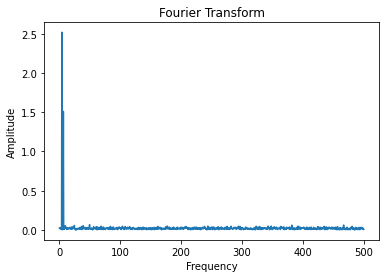

In [313]:
import time as ttime
t = np.linspace(0, 2, sample_size)
normalized_t = (t - t.min())/(t.max()-t.min()) # Normalizing t
nyquist = int(sample_rate/2)
f = np.linspace(0, nyquist, int(sample_size/2))
normalized_f = np.arange(sample_size)
normal_t0 = ttime.time()
main_coefs = np.array([np.dot(signal, np.exp(-2*np.pi*J*fre*normalized_t)) for fre in normalized_f])
normal_t1 = ttime.time()
amplitudes = np.absolute(main_coefs)
amplitudes /= sample_size # correction
amplitudes *= 2 # correction
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(f, amplitudes[range(int(sample_size/2))]) 
plt.show()

# 2-2B

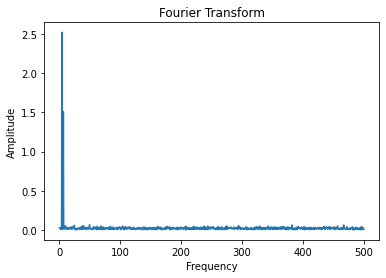

In [314]:
from scipy.fft import fft, ifft
fft_t0 = ttime.time()
coefs = fft(signal)
fft_t1 = ttime.time()
amplitudes = np.absolute(coefs)
amplitudes /= sample_size # correction
amplitudes *= 2 # correction
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(f, amplitudes[range(int(sample_size/2))]) 
plt.show()

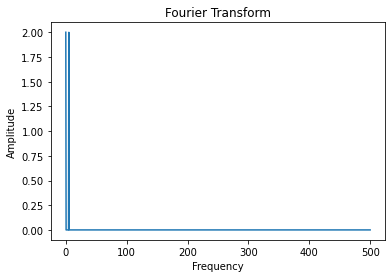

In [315]:
# Normal method

new_signal = np.sin(PI/2) + 2 * np.sin(2 * PI * 5 *t)
coefs = np.array([np.dot(new_signal, np.exp(-2*np.pi*J*fre*normalized_t)) for fre in normalized_f])
amplitudes = 2*np.absolute(coefs)
amplitudes /= sample_size # correction
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(f, amplitudes[range(int(sample_size/2))]) # correction
plt.show()

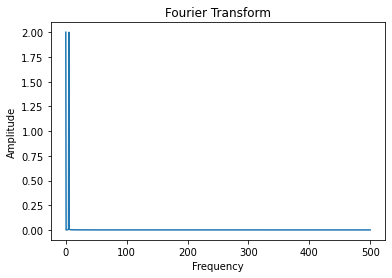

In [316]:
# Using fft
coefs = fft(new_signal)
amplitudes = 2*np.absolute(coefs)
amplitudes /= sample_size # correction
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(f, amplitudes[range(int(sample_size/2))]) # correction
plt.show()

# 2-2C

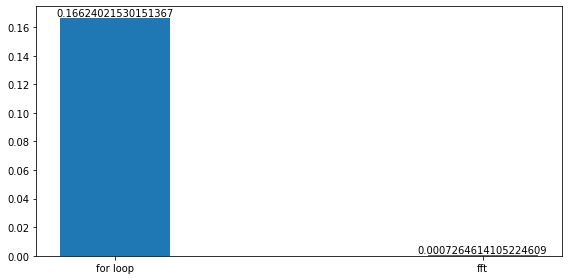

In [317]:
runtimes = [(normal_t1 - normal_t0), (fft_t1 - fft_t0)]
ticks = ["for loop", "fft"]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
bar = ax.bar(ticks, runtimes, width = 0.3)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

# Question 3: Inverse Fast Fourier Transform(ifft)/ Discrete Inverse Fourier Transform

## Problems
   * [A](#3A)
   * [B](#3B)
   * [C](#3C)
   * [D](#3D)
   * [E](#3E)

# 3A
Recovering signal

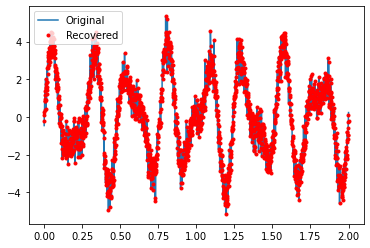

In [318]:
recovered = np.array([np.dot(main_coefs, np.exp(2*np.pi*J*fre*normalized_t)) for fre in normalized_f])
recovered /= sample_size # correction

plt.plot(t,signal,label='Original')
plt.plot(t,np.real(recovered),'r.',label='Recovered')
plt.legend()
plt.show()

# 3B
Working with fft and ifft

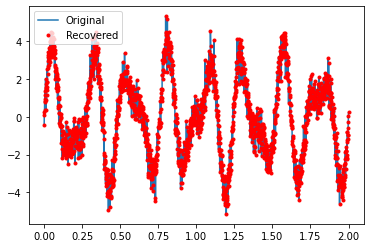

In [319]:
transformed = fft(signal)
recovered_fft = ifft(transformed)

plt.plot(t,signal,label='Original')
plt.plot(t,np.real(recovered_fft),'r.',label='Recovered')
plt.legend()
plt.show()

# 3C

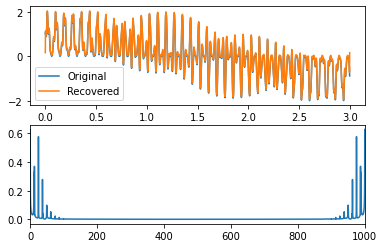

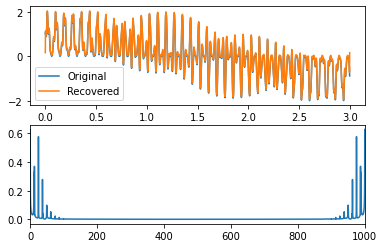

In [320]:
import pylab as pl
from IPython import display
sample_rate = 1000
t  = np.arange(0,3,1/sample_rate)
sample_size  = len(t)

signal  = (1+np.sin(2*np.pi*12*t)) * np.cos(np.sin(2*np.pi*25*t)+t) 

normalized_t = (t - t.min())/(t.max()-t.min())
f = np.linspace(0, sample_rate, sample_size)
normalized_f = np.arange(sample_size)
coefs = np.array([np.dot(signal, np.exp(-2*np.pi*J*fre*normalized_t)) for fre in normalized_f])
coefs /= sample_size

recovered = np.zeros(sample_size,dtype=complex)


for freq in range(0, sample_size):
    temp = coefs[freq] * np.exp(J*2*PI*freq*normalized_t)
    recovered = recovered + temp
    
    if freq<500 or freq>2500:
        pl.cla()
        plt.subplot2grid((2,1),(0,0))
        plt.plot(t,signal,label='Original')
        plt.plot(t,np.real(recovered),label='Recovered')
        plt.legend()
        
        plt.subplot2grid((2,1),(1,0))
        plt.plot(f[0:freq],2*np.abs(coefs[0:freq]))
        plt.xlim([0,f[-1]])

        display.clear_output(wait=True)
        display.display(plt.gcf())
        ttime.sleep(.01)


# 3D
Choosing best alpha

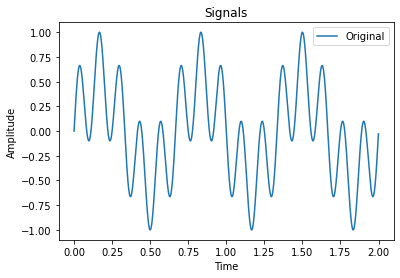

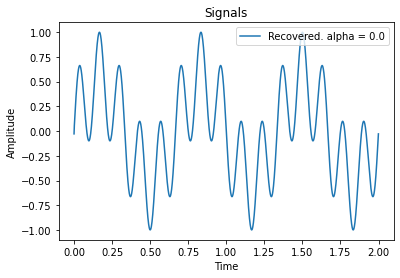

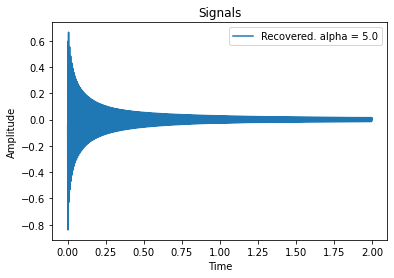

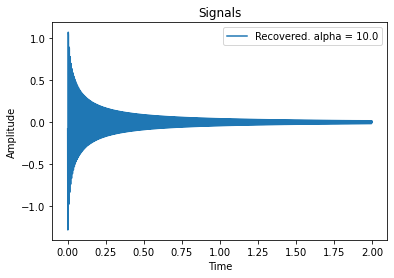

In [321]:
sample_rate = 1000
t  = np.arange(0, 2, 1/sample_rate)
sample_size  = len(t)
signal = np.sin(2 * PI * 4.5 * t) * np.cos(2 * PI * 3 * t)
f = np.linspace(0, sample_rate, sample_size)
normalized_f = np.arange(sample_size)
alphas = np.linspace(0, 10, 3)
coefs = np.zeros((len(alphas), sample_size), dtype= complex)
for i in range(len(alphas)):
    normalized_t = (t + alphas[i])/(t.max() + alphas[i])
    coefs[i] = np.array([np.dot(signal, np.exp(-2*np.pi*J*fre*normalized_t)) for fre in normalized_f])

plt.title('Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(t, signal,label='Original')
plt.legend()
plt.show()
for i in range(len(alphas)):
    plt.title('Signals')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    normalized_t = (t + alphas[i])/(t.max() + alphas[i])
    recovered = np.array([np.dot(coefs[i], np.exp(2*np.pi*J*fre*normalized_t)) for fre in normalized_f])/sample_size
    plt.plot(t, np.real(recovered) ,label='Recovered. alpha = {}'.format(alphas[i]))
    plt.legend()
    plt.show()

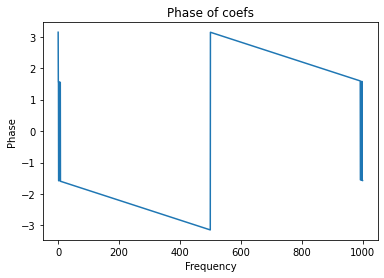

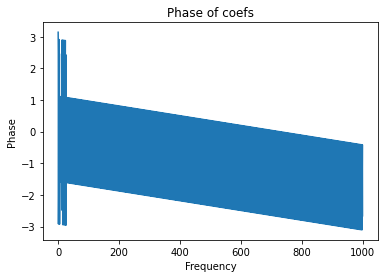

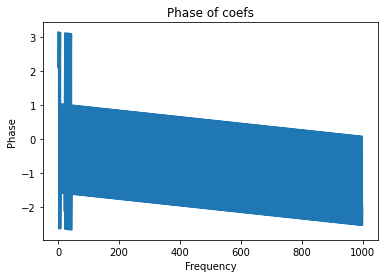

In [323]:
for i in range(len(alphas)):
    plt.title('Phase of coefs')
    plt.xlabel('Frequency')
    plt.ylabel('Phase')
    phase = np.angle(coefs[i])
    plt.plot(f, phase ,label='Phase of coefs. alpha = {}'.format(alphas[i]))
    plt.show()

# 3E

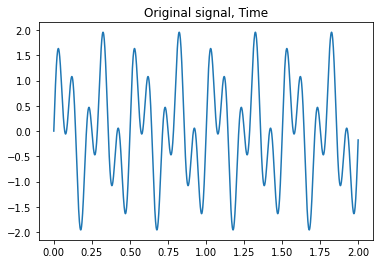

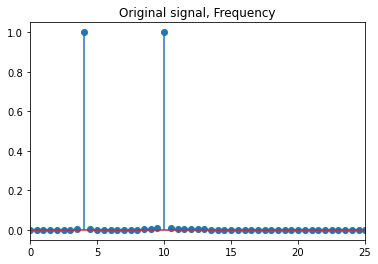

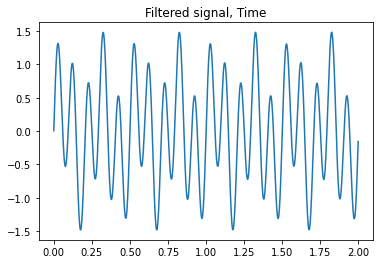

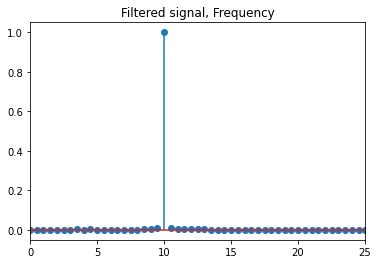

In [324]:
sample_rate = 1000
t  = np.arange(0,2-1/sample_rate,1/sample_rate)
sample_size  = len(t)
 
signal = np.sin(2*np.pi*4*t) + np.sin(2*np.pi*10*t)


normalized_t = np.array(np.arange(0,sample_size))/sample_size
coefs   = np.zeros(len(signal), dtype=complex)

for fre in range(0, sample_size):
    temp = np.exp(-J*2*np.pi*fre*normalized_t )
    coefs[fre] = np.sum(np.multiply(signal, temp) )/sample_size

f = np.linspace(0, sample_rate/2, int(np.floor(sample_size/2.0)+1))

freq_index = np.argmin(np.abs(f-4))

changed_coefs = list(coefs)
changed_coefs[freq_index] = 0


new_signal = np.zeros(len(signal), dtype=complex)
for fre in range(0, sample_size):
    temp = changed_coefs[fre] * np.exp( J*2*np.pi*fre*normalized_t )
    new_signal = new_signal + temp

new_signal

plt.plot(t, signal)
plt.title('Original signal, Time')
plt.show()

plt.stem(f, 2*np.abs(coefs[0:len(f)]))
plt.xlim([0,25])
plt.title('Original signal, Frequency')
plt.show()

plt.plot(t, np.real(new_signal))
plt.title('Filtered signal, Time')
plt.show()


plt.stem(f,2*np.abs(changed_coefs[0:len(f)]))
plt.xlim([0,25])
plt.title('Filtered signal, Frequency')
plt.show()

# Question 4: Applictaions of Fourier Transform

## Problems
* [Convolution in Frequency Domain](#Convolution-in-Frequency-Domain)
* [Narrow band Temporal Filtering](#Narrow-band-Temporal-Filtering)
* [Image Filtering 2D](#Image-Filtering-2D)
* [Low Pass Filtering](#Low-Pass-Filtering)
    * [4-1A](#4-1A)
    * [4-1B](#4-1B)
* [High Pass Filtering](#High-Pass-Filtering)
    * [4-2A](#4-2A)
    * [4-2B](#4-2B)

# Convolution in Frequency-Domain

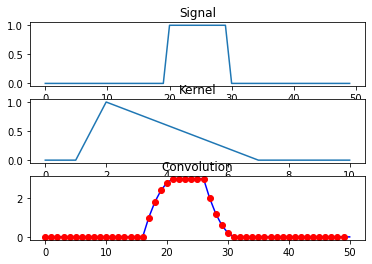

In [325]:
signal_size = 50 
kernel_size = 11

signal = np.zeros(signal_size)
signal[range(int(signal_size*.4),int(signal_size*.6))] = 1


kernel = np.zeros(kernel_size)
kernel[range(int(kernel_size*.25),int(kernel_size*.8))] = np.linspace(1,0,int(kernel_size*.55))


plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')

plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')


conv_size = signal_size + kernel_size -1
half_size = np.floor(kernel_size/2)

signal_fft = fft(signal,conv_size)
kernel_fft = fft(kernel, conv_size)

conv = np.real( ifft( signal_fft * kernel_fft ) )

conv = conv[range(int(half_size),int(len(conv)-half_size+1))]


plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Convolution')

plt.plot(np.convolve(signal, kernel, mode='same'),'ro')

plt.show()

# Narrow band Temporal Filtering

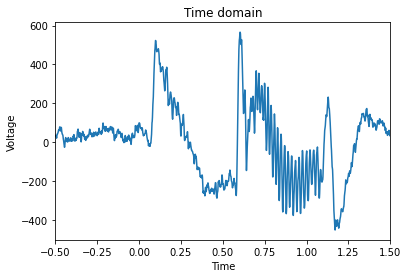

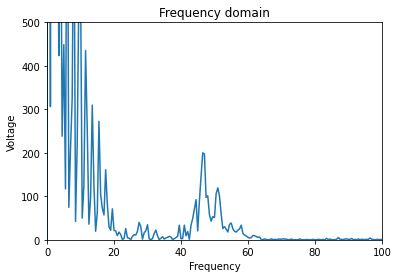

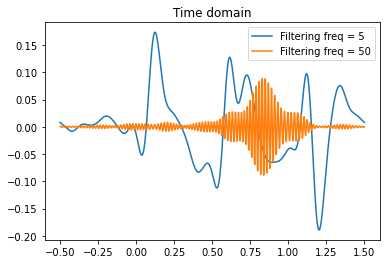

In [326]:
import scipy.io as sio
matdata = sio.loadmat('braindata.mat')

timevec = matdata['timevec'][0]
srate = matdata['srate'][0][0]
braindata = matdata['braindata'][0]


sample_size = len(timevec)

plt.plot(timevec, braindata)
plt.xlim([-.5,1.5])
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Time domain')
plt.show()


coefs = fft(braindata)/sample_size
spectrum = 2*np.square(np.abs(coefs))
f = np.linspace(0, srate, sample_size) 

plt.plot(f, spectrum[0:len(f)])
plt.xlim([0,100])
plt.ylim([0,500])
plt.xlabel('Frequency')
plt.ylabel('Voltage')
plt.title('Frequency domain')
plt.show()

filtered_freq = [5, 50]
new_waves = np.zeros((2, sample_size))
for i in range(0, len(filtered_freq)):
    x  = f - filtered_freq[i]
    g = np.exp(-(x/4)**2)
    new_waves[i] = 2*np.real(ifft(np.multiply(coefs, g)))
    plt.plot(timevec, new_waves[i], label='Filtering freq = {}'.format(filtered_freq[i]))
    plt.title('Time domain')
plt.legend()    
plt.show()

# Image Filtering 2D

In [327]:
from PIL import Image
lenna = np.asarray(Image.open("Lenna.png"))

# Low Pass Filtering

# 4-1A

new shape =  (512, 512)


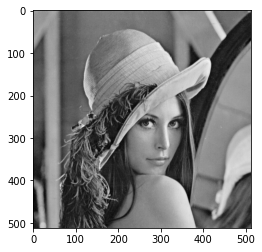

In [328]:
bw = np.mean(lenna, axis=2)
plt.imshow(bw, cmap='gray')
print("new shape = ", bw.shape)

# 4-1B

Text(0.5, 1.0, 'Amplitude spectrum')

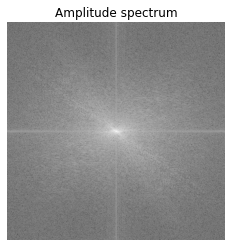

In [329]:
from scipy.fft import fft2, fftshift, ifft2, ifftshift
coefs  = fftshift(fft2(bw))
spectrum = np.log(np.abs(coefs))

plt.imshow(spectrum, cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')

Blurring using gaussian filter

In [330]:
from scipy import stats
width = .1
lims = np.shape(bw)
xr = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr, xr)
gaus2d = np.exp(-(x**2 + y**2)/(2*width**2))

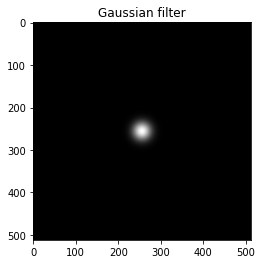

In [331]:
plt.imshow(gaus2d, cmap='gray')
plt.title('Gaussian filter')
plt.show()

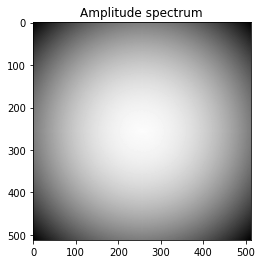

In [332]:
blur_coefs = coefs * gaus2d

new_spectrum = np.log(np.abs(blur_coefs))

plt.imshow(new_spectrum, cmap='gray')
plt.title('Amplitude spectrum')
plt.show()

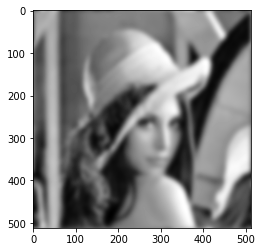

In [333]:
blur = ifft2(ifftshift(blur_coefs))

plt.imshow(np.real(blur), cmap = 'gray')

# High Pass Filtering

# 4-2A

In [334]:
width = 0.1
lims = np.shape(bw)
xr = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr, xr)
gaus2d = (1-np.exp(-(x**2 + y**2)/(2*width**2)))

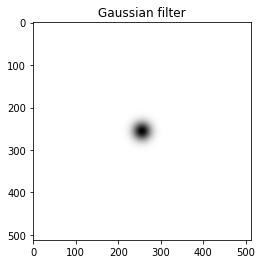

In [335]:
plt.imshow(gaus2d, cmap='gray')
plt.title('Gaussian filter')
plt.show()

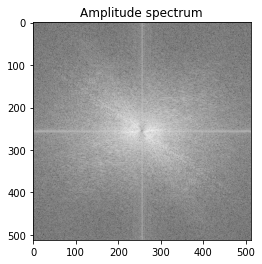

In [336]:
sharpen_coefs = coefs * gaus2d

new_spectrum = np.log(np.abs(sharpen_coefs))

plt.imshow(new_spectrum, cmap='gray')
plt.title('Amplitude spectrum')
plt.show()

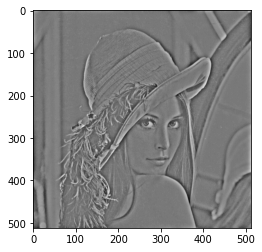

In [337]:
sharpen = ifft2(ifftshift(sharpen_coefs))

plt.imshow(np.real(sharpen), cmap = 'gray')

# 4-2B
Details are covered in report.